In [1]:
# Create a dataset. 2D. The total number of values will be 1500 labeled 0 or 1 instances
# How we generate the values: class 1 - normal distribution centered [16,14] [10,6] [14,14]
#instance of class 0 will be generated using the uniform distribution in a square region 20
# equal number of classes*** inheritance 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import random
%matplotlib inline

In [3]:
# the total no. of items wil be 1500
N=1500

In [4]:
mean1 = [6,14]
mean2 = [10,6]
mean3 = [14,14]
cov = [[3.5,0], [0,3.5]]

In [5]:
np.random.seed(50)

In [6]:
x =np.random.multivariate_normal(mean1, cov, int(N/6))

In [7]:
x =np.concatenate((x, np.random.multivariate_normal(mean2, cov, int(N/6))))

In [8]:
x[1:5]

array([[ 4.83834929, 11.2600208 ],
       [ 8.64150932, 13.10811583],
       [ 4.5398758 , 16.00228759],
       [ 3.60105022, 11.51651438]])

In [9]:
x.shape

(500, 2)

In [10]:
x =np.concatenate((x, np.random.multivariate_normal(mean3, cov, int(N/6))))

In [11]:
x.shape

(750, 2)

In [12]:
x = np.concatenate((x, 20*np.random.rand(int(N/2),2)))

In [13]:
x.shape

(1500, 2)

In [14]:
x[:10]

array([[ 3.0808485 , 13.94204621],
       [ 4.83834929, 11.2600208 ],
       [ 8.64150932, 13.10811583],
       [ 4.5398758 , 16.00228759],
       [ 3.60105022, 11.51651438],
       [ 6.23635608, 15.61301674],
       [ 7.3034755 , 13.37408585],
       [ 4.13379962, 16.99128351],
       [12.20006725, 15.84794932],
       [ 6.23173255, 15.38962423]])

In [15]:
y = np.concatenate((np.ones(int(N/2)), np.zeros(int(N/2))))
# first 750 assigned 1 and the last 750 -- 0

In [16]:
y

array([1., 1., 1., ..., 0., 0., 0.])

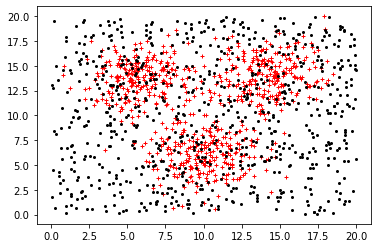

In [17]:
plt.plot(x[:int(N/2), 0], x[:int(N/2),1], 'r+', x[int(N/2):, 0], x[int(N/2):,1], 'k.', ms=4)

In [18]:
# Training and Test Dataset

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=np.random.seed(7))

In [21]:
X_train.shape

(1200, 2)

In [22]:
X_test.shape

(300, 2)

In [23]:
from sklearn import tree

In [24]:
from sklearn.metrics import accuracy_score

In [25]:
#MOdel fitting and evaluation

In [26]:
maxdepths = [2, 3, 4, 5, 6,7,8,9, 10,15,20,25,30,35,40, 45, 50]

In [27]:
trainAcc=np.zeros(len(maxdepths))

In [28]:
trainAcc

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [29]:
testAcc = np.zeros(len(maxdepths))

In [30]:
testAcc

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [31]:
# Question - Which is the most important
# is it the test accuracy or the trainning accur

In [32]:
index = 0
for depth in maxdepths:
    clf = tree.DecisionTreeClassifier(max_depth = depth)
    clf=clf.fit(X_train, y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)
    trainAcc[index] = accuracy_score(y_train, Y_predTrain)
    testAcc[index]= accuracy_score(y_test, Y_predTest)
    index += 1

In [33]:
trainAcc

array([0.63166667, 0.675     , 0.71166667, 0.71416667, 0.74333333,
       0.76333333, 0.78333333, 0.79666667, 0.81666667, 0.90666667,
       0.9775    , 0.9975    , 1.        , 1.        , 1.        ,
       1.        , 1.        ])

In [34]:
testAcc

array([0.65      , 0.68      , 0.71      , 0.70666667, 0.71333333,
       0.72      , 0.68333333, 0.68      , 0.7       , 0.67333333,
       0.68666667, 0.69666667, 0.69      , 0.68333333, 0.69333333,
       0.67333333, 0.68333333])

Text(0, 0.5, 'Accuracy')

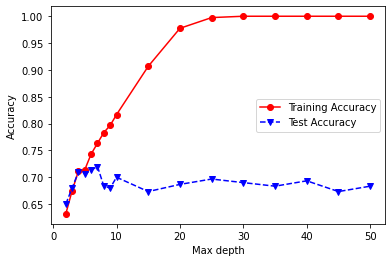

In [35]:
plt.plot(maxdepths, trainAcc, 'ro-', maxdepths, testAcc, 'bv--')
plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy')

In [36]:
testAcc

array([0.65      , 0.68      , 0.71      , 0.70666667, 0.71333333,
       0.72      , 0.68333333, 0.68      , 0.7       , 0.67333333,
       0.68666667, 0.69666667, 0.69      , 0.68333333, 0.69333333,
       0.67333333, 0.68333333])

In [37]:
maxdepths

[2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 45, 50]

In [38]:
max(testAcc)

0.72

In [39]:
#Best depth is when the accuracy of the test is highest. This is at a depth of 7

In [40]:
max(trainAcc)

1.0

In [41]:
trainAcc

array([0.63166667, 0.675     , 0.71166667, 0.71416667, 0.74333333,
       0.76333333, 0.78333333, 0.79666667, 0.81666667, 0.90666667,
       0.9775    , 0.9975    , 1.        , 1.        , 1.        ,
       1.        , 1.        ])